# Train Stock Prive Prediction Model

This model predic the open price of the next day of the specific stock.

## Import Packages

In [1]:
import os
import pandas as pd
from prophet import Prophet

## Constants & Settings

In [2]:
DATA_SOURCE_FOLDER = "/workspaces/valuation/data/staging/stock_price_labeled"
BEST_MODEL_DESTINATION = "/workspaces/valuation/models"

LOOK_FORWARD_DAYS = 90

# Create folders
os.makedirs(BEST_MODEL_DESTINATION, exist_ok=True)

## Read Preprocessed Data

In [3]:
train = pd.read_csv(os.path.join(DATA_SOURCE_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_SOURCE_FOLDER, 'test.csv'))

## Model Training

In [4]:
model = Prophet()
model.fit(train)

20:49:31 - cmdstanpy - INFO - Chain [1] start processing
20:49:31 - cmdstanpy - INFO - Chain [1] done processing


## Predict

In [5]:
future = model.make_future_dataframe(periods=LOOK_FORWARD_DAYS)
forecast = model.predict(future)

## Plot

In [6]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
849,2019-05-11,31.620199,30.528793,34.390287,30.294267,33.052477,0.799909,0.799909,0.799909,2.004716,2.004716,2.004716,-1.204807,-1.204807,-1.204807,0.0,0.0,0.0,32.420107
850,2019-05-12,31.608236,30.339184,34.218122,30.256240,33.067613,0.721987,0.721987,0.721987,2.004716,2.004716,2.004716,-1.282729,-1.282729,-1.282729,0.0,0.0,0.0,32.330223
851,2019-05-13,31.596274,27.580537,31.481299,30.212881,33.088996,-2.120065,-2.120065,-2.120065,-0.766923,-0.766923,-0.766923,-1.353142,-1.353142,-1.353142,0.0,0.0,0.0,29.476209
852,2019-05-14,31.584311,27.441587,31.480624,30.170277,33.111558,-2.209345,-2.209345,-2.209345,-0.793822,-0.793822,-0.793822,-1.415523,-1.415523,-1.415523,0.0,0.0,0.0,29.374966
853,2019-05-15,31.572349,27.273339,31.601648,30.128995,33.123924,-2.261873,-2.261873,-2.261873,-0.792334,-0.792334,-0.792334,-1.469538,-1.469538,-1.469538,0.0,0.0,0.0,29.310476


/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/devuser/.local/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


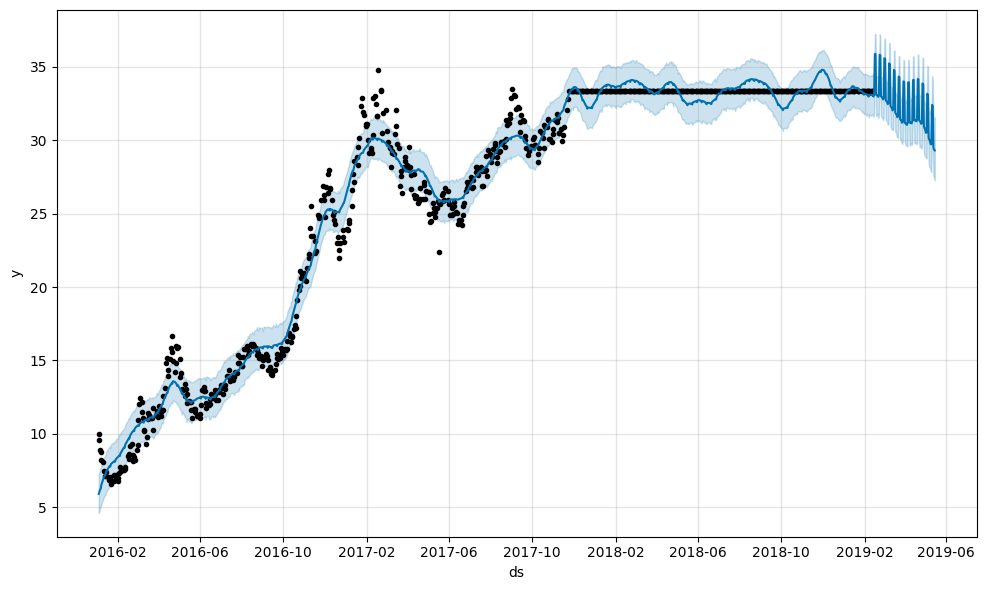

In [7]:
fig1 = model.plot(forecast)